In [23]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint
import fiona
from fiona.crs import from_epsg
from scipy.spatial import cKDTree
import numpy as np
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [7]:
cd

C:\Users\szej01


In [8]:
fp = r"D:\Box Sync\Policy Evaluation\working_data\analytical_file_panel.dta"
df = pd.read_stata(fp)

In [9]:
df.head(2)

,intersection_id,month,year,monthly,index,ST1_Name,ST2_Name,ST3_Name,ST4_Name,distance_to_LPIS,...,day_cyclistinjured,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision,coordinate1,coordinate2,coordinate3
0,1,7,2012,2012-07-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619
1,1,8,2012,2012-08-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619


In [10]:
df.columns

Index(['intersection_id', 'month', 'year', 'monthly', 'index', 'ST1_Name',
       'ST2_Name', 'ST3_Name', 'ST4_Name', 'distance_to_LPIS',
       ...
       'day_cyclistinjured', 'day_cyclistkilled', 'day_motoristinjured',
       'day_motoristkilled', 'flag_collision', 'latenight_flag_collision',
       'day_flag_collision', 'coordinate1', 'coordinate2', 'coordinate3'],
      dtype='object', length=150)

In [11]:
# Put the latitude and longtitude 
df['geometry'] = list(zip(df.coordinate2, df.coordinate3))
df.head(2)

,intersection_id,month,year,monthly,index,ST1_Name,ST2_Name,ST3_Name,ST4_Name,distance_to_LPIS,...,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision,coordinate1,coordinate2,coordinate3,geometry
0,1,7,2012,2012-07-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,"(982769.3310000002, 202206.1618999988)"
1,1,8,2012,2012-08-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,"(982769.3310000002, 202206.1618999988)"


In [12]:
df['geometry'] = df['geometry'].apply(Point)
df.head(2)

,intersection_id,month,year,monthly,index,ST1_Name,ST2_Name,ST3_Name,ST4_Name,distance_to_LPIS,...,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision,coordinate1,coordinate2,coordinate3,geometry
0,1,7,2012,2012-07-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,POINT (982769.3310000002 202206.1618999988)
1,1,8,2012,2012-08-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,POINT (982769.3310000002 202206.1618999988)


In [13]:
df1 = gpd.GeoDataFrame(df, geometry='geometry')
df1.head(2)

,intersection_id,month,year,monthly,index,ST1_Name,ST2_Name,ST3_Name,ST4_Name,distance_to_LPIS,...,day_cyclistkilled,day_motoristinjured,day_motoristkilled,flag_collision,latenight_flag_collision,day_flag_collision,coordinate1,coordinate2,coordinate3,geometry
0,1,7,2012,2012-07-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,POINT (982769.3310000002 202206.1618999988)
1,1,8,2012,2012-08-01,1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,592,...,0,0,0,0.0,0.0,0.0,POINT,982769.331,202206.1619,POINT (982769.3310000002 202206.1618999988)


In [14]:
#df1.crs = {'init' :'epsg:2263'}
df1.crs = from_epsg(2263)

In [15]:
df1.crs

{'init': 'epsg:2263', 'no_defs': True}

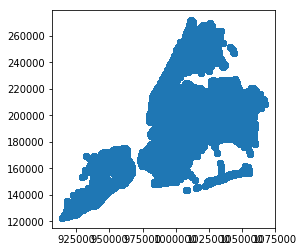

In [16]:
df1.plot()

## Saving the analytical panel dataset as a shapefile
The shapefile is needed to calculate the contiguity matrix in stata

In [17]:
type(df1)

geopandas.geodataframe.GeoDataFrame

In [18]:
df1['geometry'].head()

0    POINT (982769.3310000002 202206.1618999988)
1    POINT (982769.3310000002 202206.1618999988)
                        ...                     
3    POINT (982769.3310000002 202206.1618999988)
4    POINT (982769.3310000002 202206.1618999988)
Name: geometry, Length: 5, dtype: object

## Not sure why I am unable to save as shapefile
in the meantime, I'm saving into csv to read into QGIS to save as shapefile

In [20]:
fp =  r"C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_shapefile.csv"
#df1.to_csv(fp, encoding='utf-8')

In [27]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [37]:
save_out = df1[['intersection_id','month','year','index','geometry']]

In [38]:
fp =  r"C:\Users\jerem\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\new_analytical_panel_shapefile"
save_out.to_file(r"D:\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\new_analytical_panel_shapefile.shp")